In [1]:
from skimage import io
import matplotlib.pyplot as plt
from skimage.color import rgb2hsv, rgb2gray, hsv2rgb, rgb2ycbcr
import numpy as np
from ipywidgets import interact, IntSlider

In [2]:
from glob import glob
from pathlib import Path

In [3]:
def collage(data, n=6, m=3, width=12, imparams={}):
    sh = data[0].shape
    ratio = sh[0]/sh[1] * n/m
    fig, axes = plt.subplots(n, m,
                             gridspec_kw={"wspace": 0, "hspace": 0})
    fig.set_size_inches(width, width*ratio)
    axes = axes.flatten()
    for i, img in enumerate(data):
        axes[i].axis("off")
        axes[i].imshow(img, aspect='auto', **imparams)
    plt.show()

In [4]:
def colax(m, n):
    fig, axs = plt.subplots(m, n) #, gridspec_kw={"wspace": 0, "hspace": 0})
    return fig, (a for a in axs.flatten())

In [5]:
ims = [io.imread(f) for f in glob("*.jpg")]

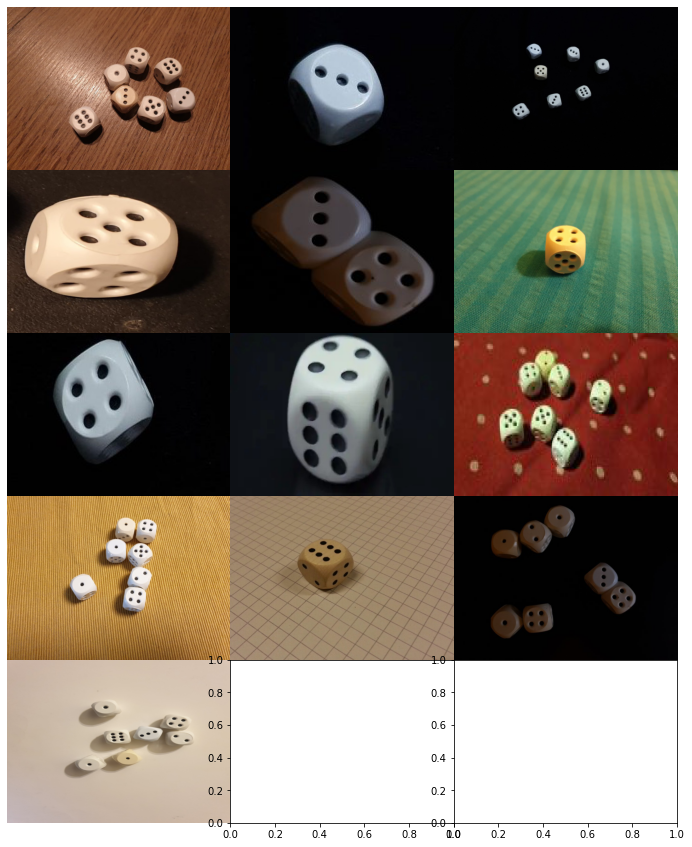

In [6]:
collage(ims, 5, 3)

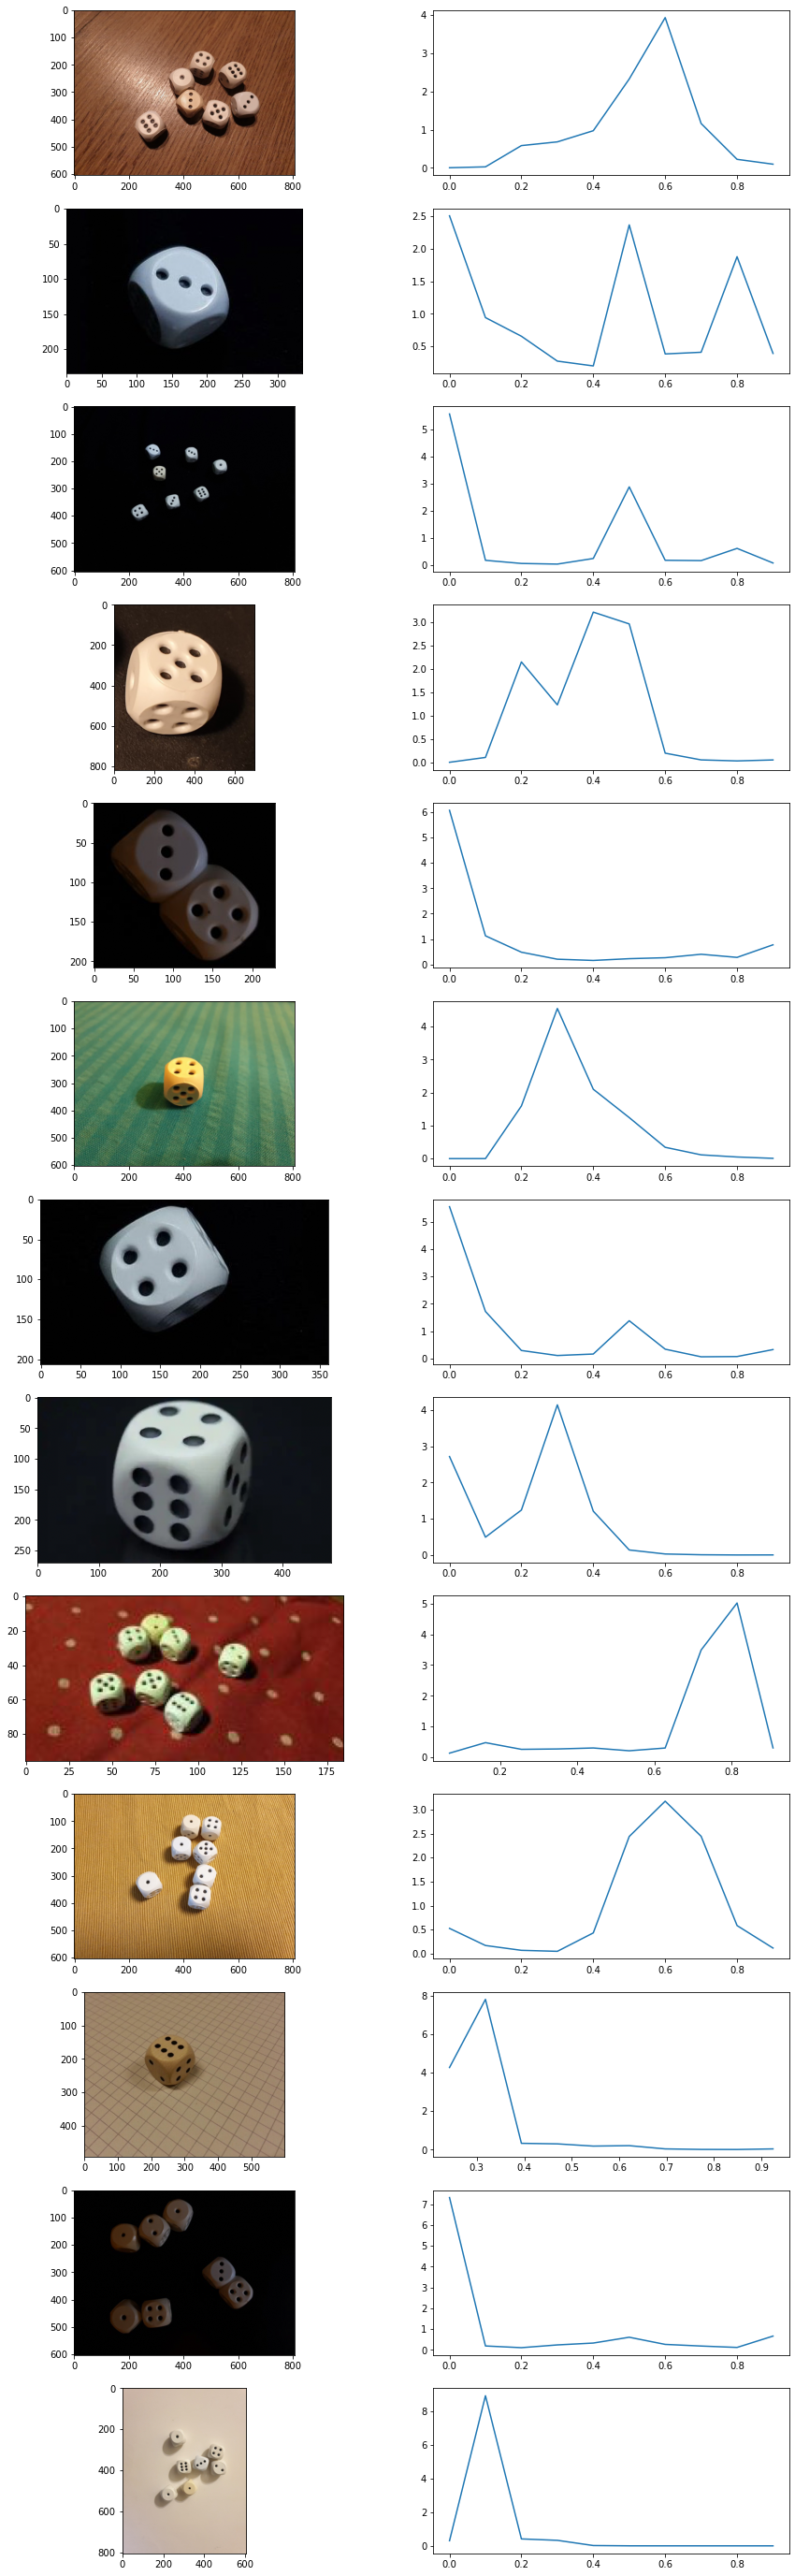

In [7]:
tra = [rgb2hsv(i) for i in ims]
im1 = [i.copy() for i in ims]
for t,i in zip(tra, im1):
    pass
    #i[t[:,:,1]> ms]=0
# tra = [hsv2rgb(i) for i in tra]
f, ag = colax(13, 2)
f.set_size_inches(15, 50)
for t,i in zip(tra, im1):
    next(ag).imshow(hsv2rgb(t))
    a, b = np.histogram(t[:, :, 1], density=True)
    next(ag).plot(b[:-1], a)
#collage(im1, 5, 3)

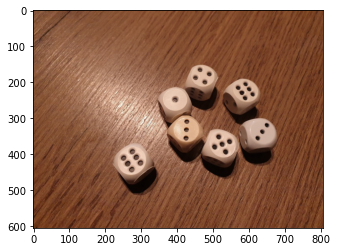

interactive(children=(FloatSlider(value=0.5, description='a', max=1.5, min=-0.5), Output()), _dom_classes=('wi…

In [11]:
im = ims[0]
tt = rgb2hsv(im)
plt.imshow(im)
@interact(a=0.5)#(0.0, 1, 0.01))
def satth(a):
    i = im.copy()
    i[tt[:, :, 1] <= a] = 0
    i[tt[:, :, 1] > a] = 255
    
    #i[tt[:, :, 0] >= c] = 0
    plt.imshow(i)
    